Environmment: Wrangler

# <font color = 'purple'> Data Cleaning & Exploration
In this notebook, we clean and explore the raw dataset downloaded from [kaggle](https://www.kaggle.com/c/digit-recognizer)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(r"C:\Users\sharo\Documents\Postgrad\My Data Science Portfolio\Classification - MNIST")
os.getcwd()

'C:\\Users\\sharo\\Documents\\Postgrad\\My Data Science Portfolio\\Classification - MNIST'

In [3]:
#set default style for plots
sns.set_style("whitegrid")
matplotlib.rcParams.update({'font.size': 12})

## <font color ='blue'>Import data

In [4]:
df = pd.read_csv("train.csv")
df.columns=df.columns.str.lower() #convert column names to lower case
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Overview of Variables

**Label**   
- This is the true class/ label for the data point - i.e. the actual digit written by the user

**Feature vector: pixel0, pixel1, ... pixel783**
- Remaining columns contain the pixel-values of the associated image.
- Each pixel value indicates the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
- To locate pixel*x* on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

## <font color = 'blue'>Data Cleaning

### Check for Missing Values

In [5]:
df.isnull().any().any() # no missing values

False

### Check for invalid values/ structural errors in data

In [6]:
df.info() #confirm that all values are integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


<AxesSubplot:xlabel='label', ylabel='count'>

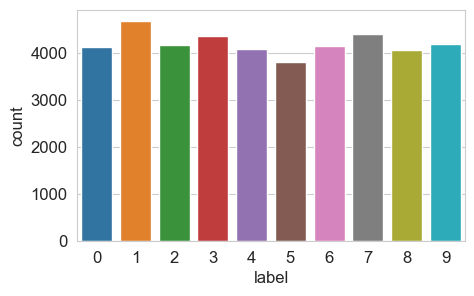

In [11]:
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data=df, x='label')

As expected, labels are digits from 0 to 9. We have a fairly even distribution of classes in our training dataset

In [7]:
(df.iloc[:,1:]<0).any().any() 

False

In [8]:
(df.iloc[:,1:]>255).any().any() 

False

As expected, there are no pixel values less than zero or greater than 255

## <font color = 'blue'> Feature Selection

In [12]:
df_desc = pd.DataFrame(df.describe()).loc[['min','max'],:]
df_desc.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.0,254.0,253.0,253.0,254.0,62.0,0.0,0.0,0.0,0.0


- Observe that there are some pixels which are always '0' (min=0 and max=0). We filter these pixels out to reduce the dimensionality of our dataset
- This reduced set of pixels will be used for our feed forward neural network. For the convolutional neural network, the full set of pixels will be retained.

In [13]:
df_desc = df_desc.transpose()
df_desc.head()

,min,max
label,0.0,9.0
pixel0,0.0,0.0
pixel1,0.0,0.0
pixel2,0.0,0.0
pixel3,0.0,0.0


In [15]:
#identify list of columns to drop
drop_cols = df_desc[(df_desc['min']==0) & (df_desc['max']==0)].transpose().columns
drop_cols = list(drop_cols)
drop_cols

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel82',
 'pixel83',
 'pixel84',
 'pixel85',
 'pixel111',
 'pixel112',
 'pixel139',
 'pixel140',
 'pixel141',
 'pixel168',
 'pixel196',
 'pixel392',
 'pixel420',
 'pixel421',
 'pixel448',
 'pixel476',
 'pixel532',
 'pixel560',
 'pixel644',
 'pixel645',
 'pixel671',
 'pixel672',
 'pixel673',
 'pixel699',
 'pixel700',
 'pixel701',
 'pixel727',
 'pixel728',
 'pixel729',
 'pixel730',
 'pixel731',
 'pixel754',
 'pixel755',
 'pixel756',
 'pixel757',
 'pixel758',
 'pixel759',
 'pixel760',
 'pixel780',
 'pixel781',
 'pixel782',
 'pixel783']

In [16]:
df_2 = df.drop(columns=drop_cols)
df_2.head()

,label,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print(f'Original no. of features: {df.shape[1]-1}')
print(f'New no. of features: {df_2.shape[1]-1}')

Original no. of features: 784
New no. of features: 708


## <font color='blue'> Save

### Save filtered training set

In [18]:
training_final = df_2

In [ ]:
**STOP!! DO NOT OVERWRITE!**
training_final.to_csv("train_filtered.csv", index=False)

### Filter test set to the same columns, and save

In [19]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_2 = test[list(training_final.drop(columns='label').columns)]
test_2.head()

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
**STOP!! DO NOT OVERWRITE!**
test_2.to_csv("test_filtered.csv", index=False)